In [2]:
import pandas as pd 
import numbers as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import pickle
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
House_price = pd.read_csv('C:\\Users\\marya\\OneDrive\\Desktop\\PRODIGY_TrackCode_Task01\\data\\house-prices\\train.csv')
House_price.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df=House_price[['LotArea', 'BedroomAbvGr','FullBath','HalfBath','TotalBsmtSF','GrLivArea','SalePrice']]
df.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,TotalBsmtSF,GrLivArea,SalePrice
0,8450,3,2,1,856,1710,208500
1,9600,3,2,0,1262,1262,181500
2,11250,3,2,1,920,1786,223500
3,9550,3,1,0,756,1717,140000
4,14260,4,2,1,1145,2198,250000


In [8]:
df.describe()

,LotArea,BedroomAbvGr,FullBath,HalfBath,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2.866438,1.565068,0.382877,1057.429452,1515.463699,180921.195890
std,9981.264932,0.815778,0.550916,0.502885,438.705324,525.480383,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,34900.000000
25%,7553.500000,2.000000,1.000000,0.000000,795.750000,1129.500000,129975.000000
50%,9478.500000,3.000000,2.000000,0.000000,991.500000,1464.000000,163000.000000
75%,11601.500000,3.000000,2.000000,1.000000,1298.250000,1776.750000,214000.000000
max,215245.000000,8.000000,3.000000,2.000000,6110.000000,5642.000000,755000.000000


In [9]:
House_price[['LotArea', 'BedroomAbvGr','FullBath','HalfBath','TotalBsmtSF','GrLivArea','SalePrice']].isnull().sum()


LotArea         0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotalBsmtSF     0
GrLivArea       0
SalePrice       0
dtype: int64

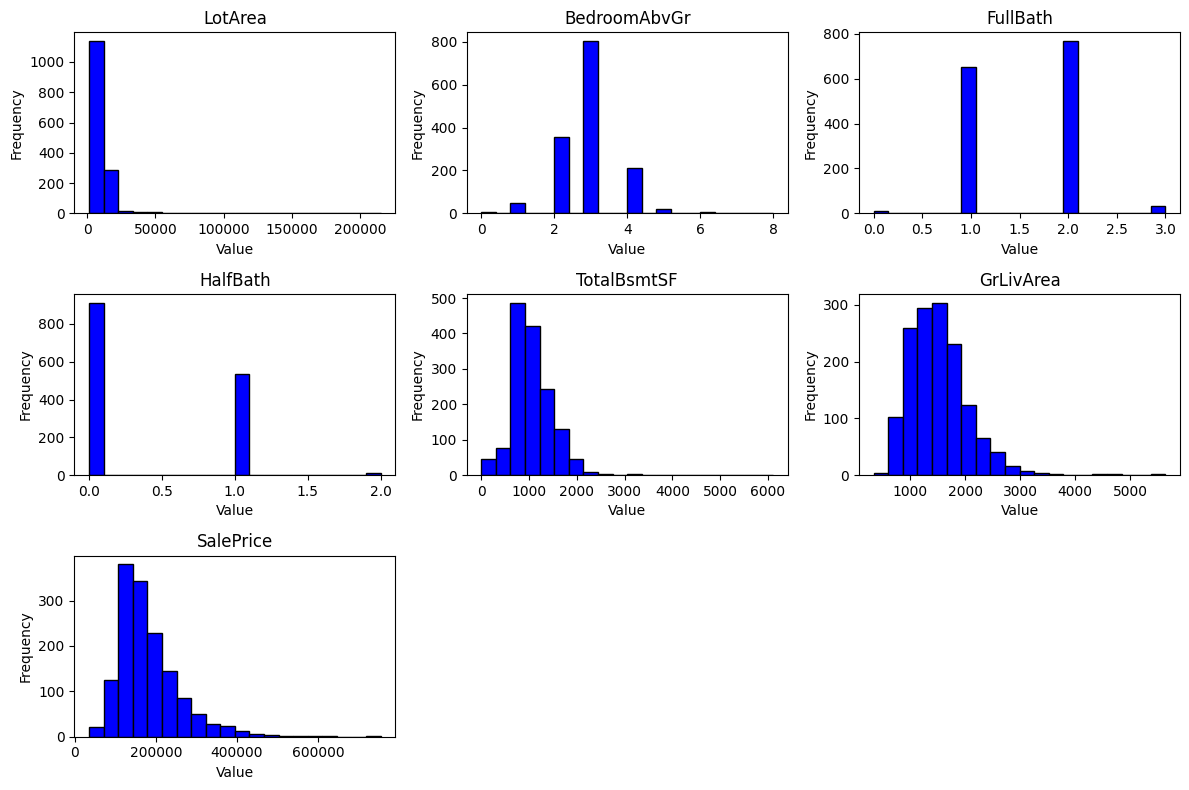

In [10]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df[column].dropna(), bins=20, color='blue', edgecolor='black')  
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

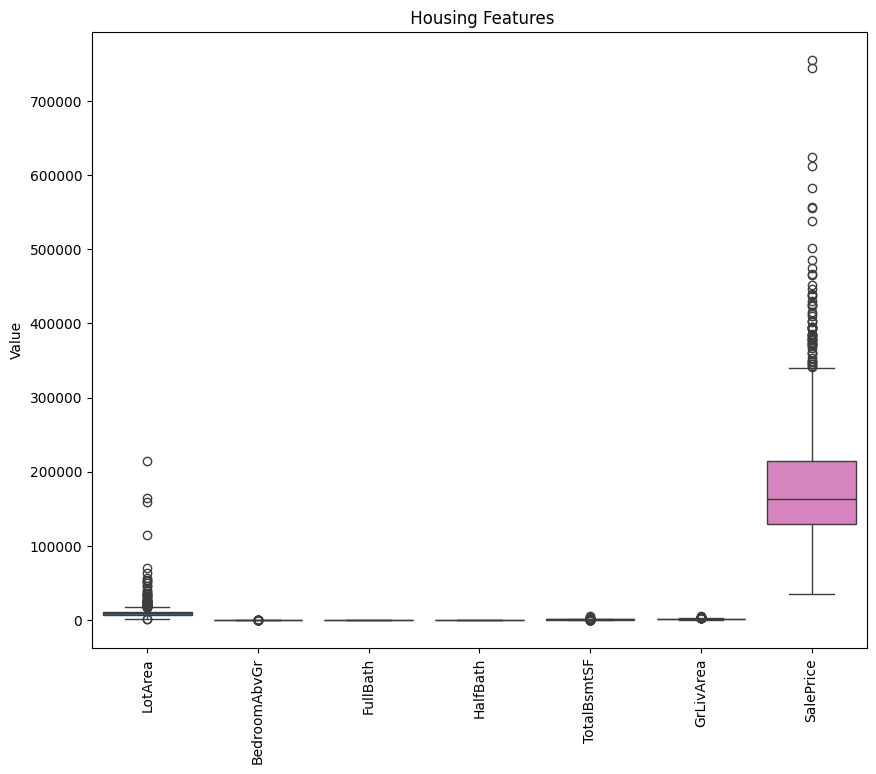

In [36]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title(' Housing Features')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


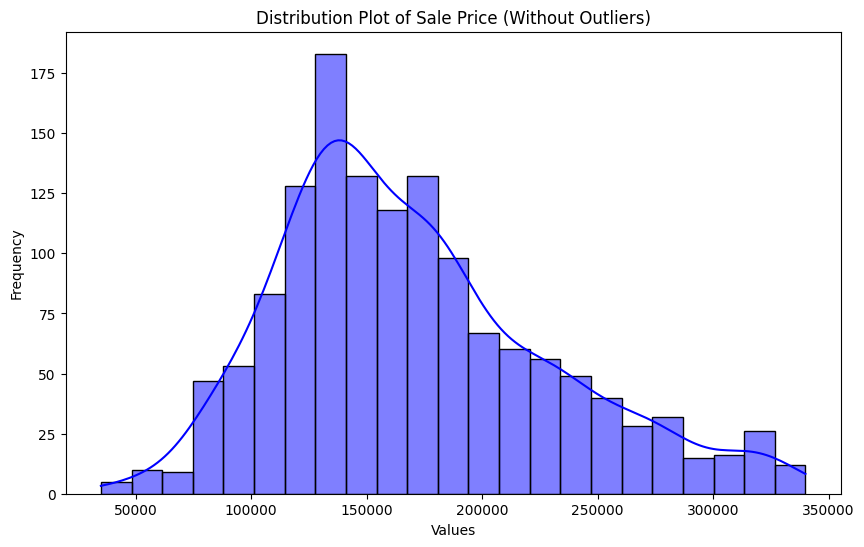

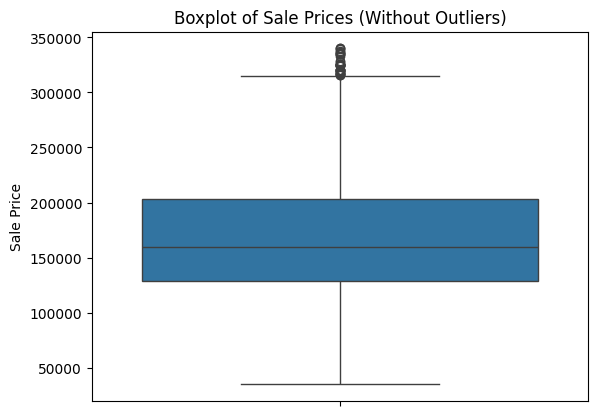

In [11]:
def remove_outliers_iqr(df, feature, threshold=1.5):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df_clean = remove_outliers_iqr(df, 'SalePrice')
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['SalePrice'], kde=True, color='blue')
plt.title('Distribution Plot of Sale Price (Without Outliers)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(y=df_clean['SalePrice'])
plt.title('Boxplot of Sale Prices (Without Outliers)')
plt.ylabel('Sale Price')
plt.show()


In [12]:
df.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,TotalBsmtSF,GrLivArea,SalePrice
0,8450,3,2,1,856,1710,208500
1,9600,3,2,0,1262,1262,181500
2,11250,3,2,1,920,1786,223500
3,9550,3,1,0,756,1717,140000
4,14260,4,2,1,1145,2198,250000


Mean Squared Error: 3800976065.171008
Root Mean Squared Error: 61652.056455328464
R-squared: 0.4496005437442999


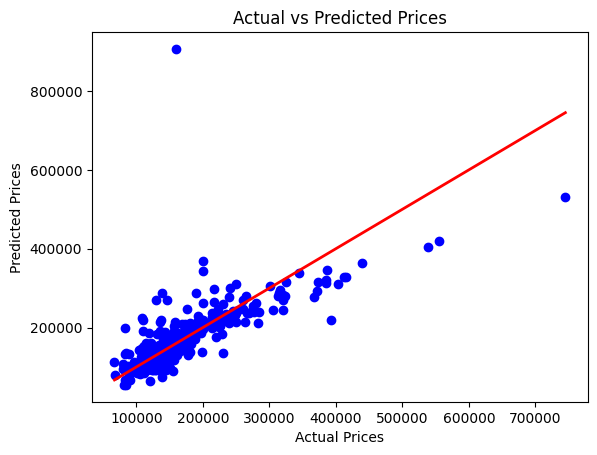

In [14]:
import numpy as np

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

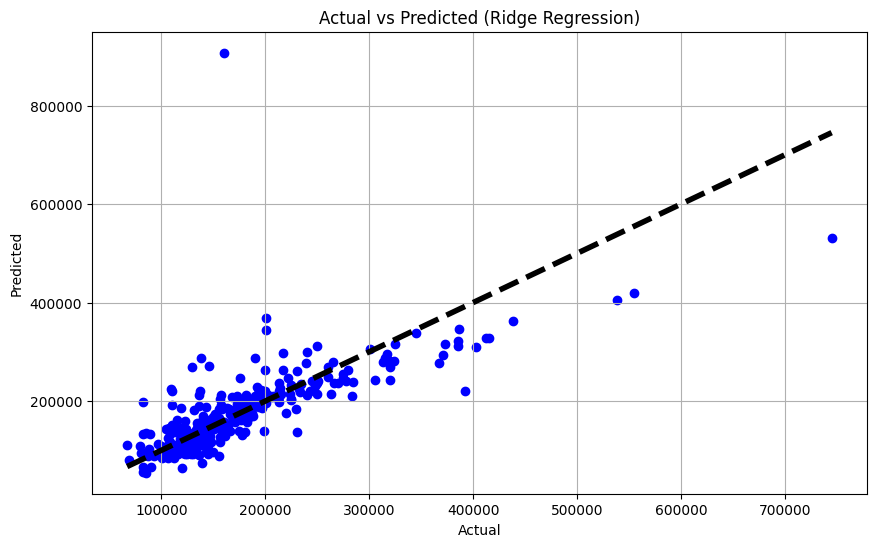

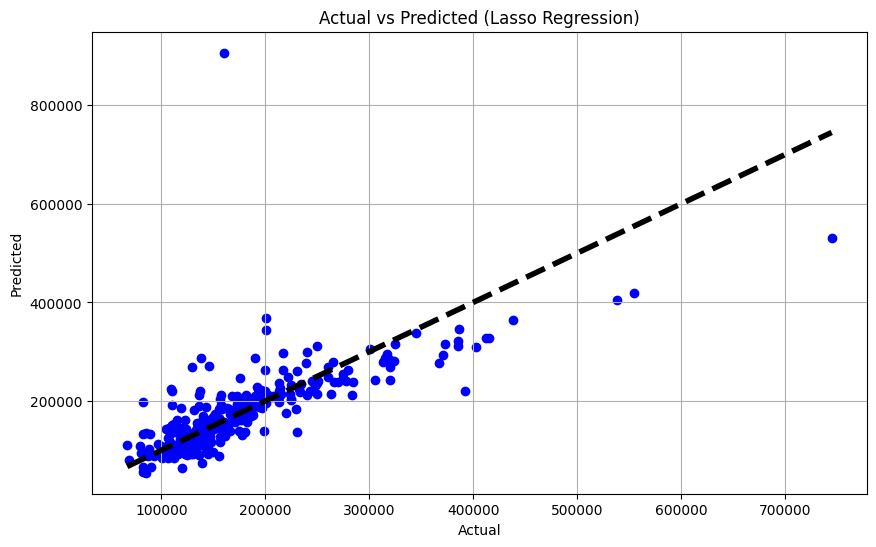

Ridge Regression R^2: 0.449, RMSE: 61660.3
Lasso Regression R^2: 0.45, RMSE: 61652.31
Best Ridge Alpha: {'alpha': 2.0}
Best Lasso Alpha: {'alpha': 2.0}


In [21]:
def perform_regression_with_cv(X_train, X_test, y_train, y_test, model_name='linear', alpha_range=None, cv=5):
    if model_name == 'linear':
        model = LinearRegression()
        params = {}
    elif model_name == 'lasso':
        model = Lasso()
        params = {'alpha': alpha_range}
    elif model_name == 'ridge':
        model = Ridge()
        params = {'alpha': alpha_range}
    else:
        raise ValueError("Invalid model name. Choose 'linear', 'lasso', or 'ridge'.")
    
    grid_search = GridSearchCV(model, params, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted ({model_name.capitalize()} Regression)')
    plt.grid(True)
    plt.show()
    
    return best_model, best_params, r2, rmse

alpha_range = [0.1, 0.5, 1.0, 2.0]

# Ridge Regression with hyperparameter tuning
ridge_model, ridge_params, ridge_r2, ridge_rmse = perform_regression_with_cv(
    X_train, X_test, y_train, y_test, model_name='ridge', alpha_range=alpha_range
)

# Lasso Regression with hyperparameter tuning
lasso_model, lasso_params, lasso_r2, lasso_rmse = perform_regression_with_cv(
    X_train, X_test, y_train, y_test, model_name='lasso', alpha_range=alpha_range
)

# Print results
print(f'Ridge Regression R^2: {round(ridge_r2, 3)}, RMSE: {round(ridge_rmse, 2)}')
print(f'Lasso Regression R^2: {round(lasso_r2, 3)}, RMSE: {round(lasso_rmse, 2)}')
print(f'Best Ridge Alpha: {ridge_params}')
print(f'Best Lasso Alpha: {lasso_params}')





In [22]:
# Save the models
with open('best_ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)  # Save the best ridge regression model

with open('best_lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)  # Save the best lasso regression model

# Summarize the results in a DataFrame
data = [
    {"Model": "Linear Regression", "R2 Score": r2, "RMSE": rmse},
    {"Model": "Lasso", "R2 Score": lasso_r2, "RMSE": lasso_rmse},
    {"Model": "Ridge", "R2 Score": ridge_r2, "RMSE": ridge_rmse}
]

models_summary = pd.DataFrame(data)
print(models_summary)

               Model  R2 Score          RMSE
0  Linear Regression  0.449601  61652.056455
1              Lasso  0.449596  61652.310488
2              Ridge  0.449453  61660.297239
